# Example 11.2 (pag 500)

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf # This time will be using formula input 
import pandas as pd
from pathlib import Path
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

TABS_DIR = Path("../tests/data")

df = pd.read_csv(TABS_DIR / "tab_11_6.csv")
df.head(3)

,Time,Temp,Yield,Viscosity,MolWeight
0,80.0,170.0,76.5,62,2940
1,80.0,180.0,77.0,60,3470
2,90.0,170.0,78.0,66,3680


In [2]:
# Transform to coded variables
dfcod = df.copy()
dfcod['Time'] = (dfcod['Time']-85)/5
dfcod['Temp'] = (dfcod['Temp']-175)/5
dfcod

,Time,Temp,Yield,Viscosity,MolWeight
0,-1.000,-1.000,76.5,62,2940
1,-1.000,1.000,77.0,60,3470
2,1.000,-1.000,78.0,66,3680
3,1.000,1.000,79.5,59,3890
4,0.000,0.000,79.9,72,3480
5,0.000,0.000,80.3,69,3200
6,0.000,0.000,80.0,68,3410
7,0.000,0.000,79.7,70,3290
8,0.000,0.000,79.8,71,3500
9,1.414,0.000,78.4,68,3360


In [3]:
# Compare models
results = {
    'linear': smf.ols(formula="Yield ~ Time + Temp", data=dfcod).fit(),
    'interaction': smf.ols(formula="Yield ~ Time + Temp + Time*Temp", data=dfcod).fit(), # called "2FI" in the book
    'quadratic': smf.ols(formula="Yield ~ Time + Temp + Time*Temp + I(Time**2) + I(Temp**2)", data=dfcod).fit(),
    'cubic': smf.ols(formula="Yield ~ Time + Temp + Time*Temp + I(Time**3) + I(Temp**3) + I(Time**2)*Temp + I(Temp**2)*Time", data=dfcod).fit(),

}
for k, v in results.items():
    print(f"{k:15s} -> P-Value: {v.fvalue:7.4f}, Adj_R-Squared: {v.rsquared_adj:7.4f}")

linear          -> P-Value:  2.6853, Adj_R-Squared:  0.2193
interaction     -> P-Value:  1.6736, Adj_R-Squared:  0.1441
quadratic       -> P-Value: 79.6686, Adj_R-Squared:  0.9704
cubic           -> P-Value: 40.8184, Adj_R-Squared:  0.9587


In [4]:
results['quadratic'].summary()

/Users/danieleongari/opt/anaconda3/envs/pydoe/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     79.67
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           5.15e-06
Time:                        12:51:25   Log-Likelihood:                 2.7787
No. Observations:                  13   AIC:                             6.443
Df Residuals:                       7   BIC:                             9.832
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       79.9400      0.119    671.264      0.000      79.658      80.222
Time             0.9951      0.094     10.568      0.000       0.772       1.218
Temp             0.5152      0.094      5.472      0.001       0.293       0.738
Time:Temp        0.2500      0.133      1.878      0.103      -0.065       0.565
I(Time ** 2)    -1.3764      0.101    -13.630      0.000      -1.615      -1.138
I(Temp ** 2)    -1.0013      0.101     -9.916      0.000      -1.240      -0.763
==============================================================================
Omnibus:                        3.017   Durbin-Watson:                   0.818
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                1.225
Skew:                           0.312   Prob(JB):                        0.542
Kurtosis:                       1.631   Cond. No.                         2.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot the fitted surface

In [5]:
p = results['quadratic'].params
p

Intercept       79.939955
Time             0.995050
Temp             0.515203
Time:Temp        0.250000
I(Time ** 2)    -1.376449
I(Temp ** 2)    -1.001336
dtype: float64

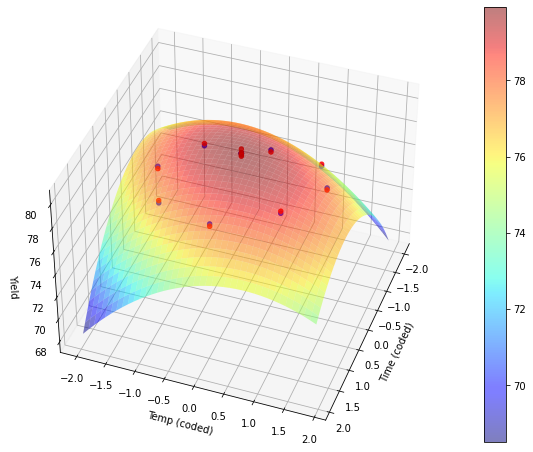

In [6]:
x1_range = np.arange(-2,2,0.1)
x2_range = np.arange(-2,2,0.1)
X1, X2 = np.meshgrid(x1_range, x2_range)

params = results['quadratic'].params
Y = p[0] + p[1]*X1* + p[2]*X2 + p[3]*X1*X2 + p[4]*X1**2 + p[5]*X2**2

fig = plt.figure(figsize=[12,8])
ax = plt.axes(projection='3d')
surface = ax.plot_surface(X1, X2, Y, alpha = 0.5, cmap='jet')
ax.scatter(dfcod['Time'], dfcod['Temp'], dfcod['Yield'], s=20, color='red', alpha=0.8)
ax.scatter(dfcod['Time'], dfcod['Temp'], results['quadratic'].predict(), s=20, color='blue', alpha=0.8)
ax.set_xlabel("Time (coded)")
ax.set_ylabel("Temp (coded)")
ax.set_zlabel("Yield")
fig.colorbar(surface)
ax.view_init(40, 20)
plt.show()